In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "2" 

# Clustering Project

## 1. Data Prep

In [2]:
# a. Read in the data file wholesale_clients.csv
import pandas as pd

data = pd.read_csv('../Data/wholesale_clients.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# b. Remove the Channel (restaurant, hotel, etc.) and Region columns since they are not fields we want to model on
data = data.iloc[:,2:] # OR data.drop(columns=['Channel', 'Region'])
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
# c. Note the number of rows and columns
data.shape

(440, 6)

In [5]:
# d. Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [6]:
# e. Double check that all the column means are 0 and standard deviations are 1
data_scaled.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


## 2. K-Means Clustering

In [7]:
# a. Import KMeans and write a loop to fit models with 2 to 15 clusters
from sklearn.cluster import KMeans

# create an empty list to hold many inertia values
inertia_values = []

# create 2 - 15 clusters, and add the inertia score to the list
for k in range(2,16):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

Text(0.5, 1.0, 'Number of Clusters vs. Inertia')

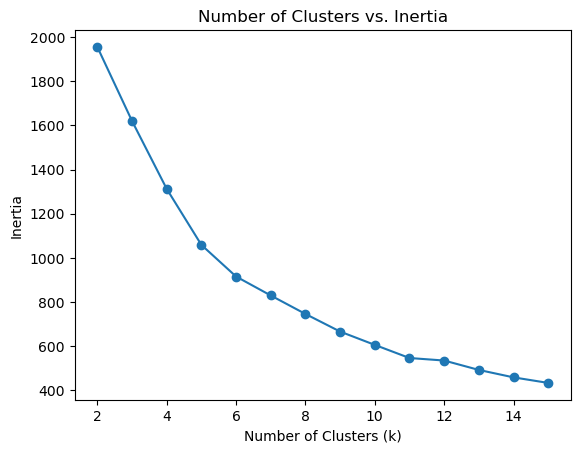

In [8]:
# b. Create an inertia plot
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series = pd.Series(inertia_values, index=range(2,16))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Number of Clusters vs. Inertia')

In [9]:
# c. Identify the elbow of the plot and fit a KMeans model just for that number of clusters
kmeans5 = KMeans(n_clusters=5, n_init='auto', random_state=42)
kmeans5.fit(data_scaled)

KMeans(n_clusters=5, random_state=42)

In [10]:
# d. Find the number of clients in each cluster
from collections import Counter

Counter(kmeans5.labels_)

Counter({3: 272, 0: 96, 1: 59, 2: 11, 4: 2})

<Axes: >

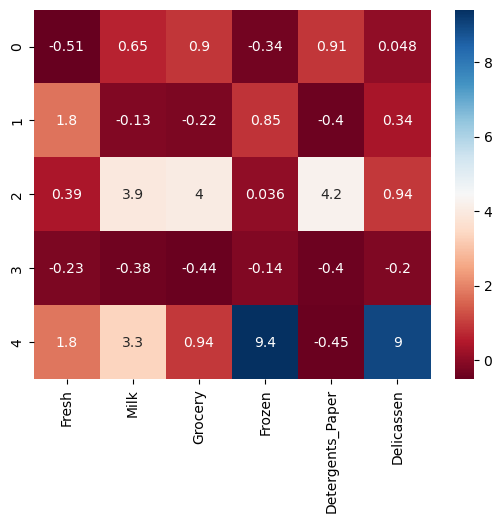

In [11]:
# e. Create a heat map of the cluster centers
import seaborn as sns

cluster_centers5 = pd.DataFrame(kmeans5.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers5, cmap='RdBu', annot=True)

In [12]:
# f. Name the clusters

* Cluster 0: **More Milk, Grocery and Paper Items**
* Cluster 1: **More Fresh and Frozen Items**
* Cluster 2: **More of Everything**
* Cluster 3: **Little of Everything**
* Cluster 4: **Lots of Frozen + Deli Items**

In [13]:
# g. Extra credit: create a silhouette scores plot instead of an inertia plot

from sklearn.metrics import silhouette_score

# Create an empty list to hold many silhouette score values
silhouette_scores = []

# create 2 - 15 clusters, and add the silhouette scores to the list
for k in range(2,16):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_,metric='euclidean',sample_size=None))

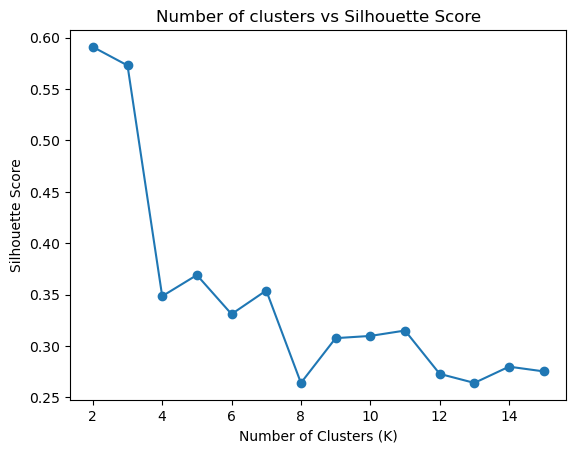

In [34]:
# plot the silhouette scores

# turn the list into a series for plotting
silhouette_series = pd.Series(silhouette_scores, index=range(2,16))

# plot the data
silhouette_series.plot(marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Number of clusters vs Silhouette Score');

In [35]:
# h. Extra credit: fit two models with the number of clusters for the two highest silhouette scores and name the clusters

In [37]:
# fit a kmeans model with 2 clusters
kmeans2 = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans2.fit(data_scaled)

KMeans(n_clusters=2, random_state=42)

In [38]:
# data points within each cluster
Counter(kmeans2.labels_)

Counter({0: 373, 1: 67})

In [39]:
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [40]:
Counter(kmeans3.labels_)

Counter({0: 350, 1: 53, 2: 37})

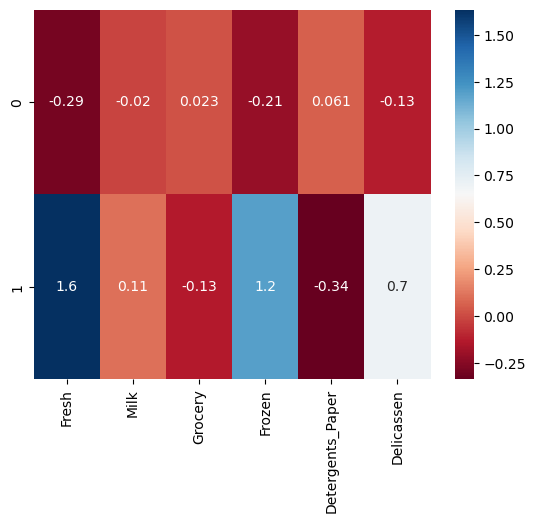

In [43]:
# View the cluster centers
cluster_centers2 = pd.DataFrame(kmeans2.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers2, cmap='RdBu', annot=True);

Name the clusters:
* Cluster 0: **Typical Clients**
* Cluster 1: **More Fresh, Frozen and Deli Items**

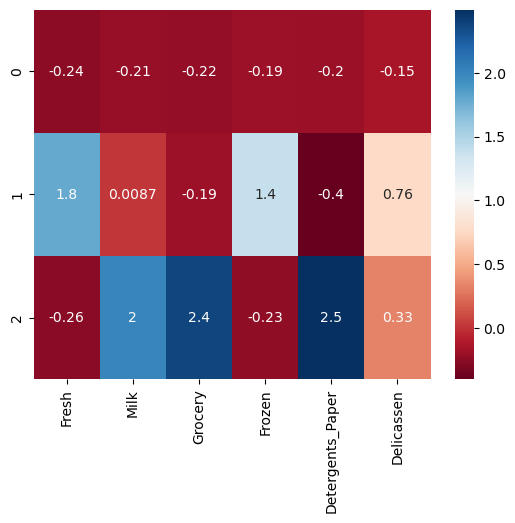

In [44]:
# View the cluster centers
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers3, cmap='RdBu', annot=True);

Name the clusters:
* Cluster 0: **Typical Clients**
* Cluster 1: **More Fresh, Frozen and Deli Items**
* Cluster 3: **More Milk, Grocery and Paper Items**

## 3. Hierarchical Clustering

In [15]:
# a. Create a dendrogram using the scaled data


In [16]:
# b. Visually identify the number of clusters and update the color threadshold, if necessary


In [17]:
# c. Fit an agglomerative clustering model on the scaled data set with the "best" clusters and view the number of data points in each cluster


In [18]:
# d. Create a cluster map of the model you just fit


In [19]:
# e. Extra credit: within the clustermap function, add z_score=0 (scales data by row), see what happens and interpret the clusters


In [20]:
# f. Extra credit: write a loop to view the silhouette score for 2 to 20 clusters


In [21]:
# g. Extra credit: fit a model with the number of clusters for the highest silhouette score


## 4. DBSCAN

In [22]:
# a. Copy over the tune_dbscan function from the demo code


In [23]:
# b. Apply the dbscan function on the scaled data


In [24]:
# c. Sort the data by highest silhouette score


In [25]:
# d. Notice that the top eps value is close to 2, so update the function to test eps values up to 5 (instead of 2)


In [26]:
# e. Try applying the function again and view the top silhouette scores


In [27]:
# f. Fit a DBSCAN model on the scaled data set with the best eps + min_samples values and view the number of data points in each cluster


## 5. Compare Techniques

For each of the following 5 models, fit the model on the scaled data, note down the number of data points in each cluster and record the silhouette score:
1. K-Means with 3 clusters
2. K-Means with 5 clusters
3. Hiearchical Clustering with 2 clusters
4. Hierarchical Clustering with 5 clusters
5. DBSCAN with 2 clusters

## 6. Recommend Client Segments

In [28]:
# a. With the top model as the K-Means model with 3 clusters, review the results again


In [29]:
# b. Clearly state what you would recommend as client segments and how you would better support those clients


## 7. Predict the Cluster of a New Client

In [30]:
# a. Given this new client, determine which cluster they fall into
import pandas as pd
import numpy as np

new_client = pd.DataFrame([np.array([15000, 15000, 30000, 500, 15000, 2000])],
                          columns=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
new_client

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,15000,15000,30000,500,15000,2000


In [31]:
# b. Scale the new client data using the same scaler object from the Data Prep step


In [32]:
# c. Make a prediction using the K-Means model with 3 clusters


In [33]:
# d. Which cluster does the new client belong to?
